<a href="https://colab.research.google.com/github/Patricia1501/LetsGrowMore-Data-Science-Internship/blob/main/Task_2(Beginner_Level)Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore Internship(Beginner Level)

### <b><center><u>Task 2-Stock Market Prediction And Forecasting Using Stacked LSTM</b></center></u>

LSTMs are an improved version of recurrent neural networks (RNNs). RNNs are analogous to human learning. When humans think, we don’t start our thinking from scratch each second. For example, in the sentence “Bob plays basketball”, we know that Bob is the person who plays basketball because we retain information about past words while reading sentences. Similarly, RNNs are networks with loops in them, which allow them to use past information before arriving at a final output. However, RNNs can only connect recent previous information and cannot connect information as the time gap grows. This is where LSTMs come into play; LSTMs are a type of RNN that remember information over long periods of time, making them better suited for predicting stock prices.

<b>Import Libraries</b><br>
To begin our project, we import numpy for making scientific computations, pandas for loading and modifying datasets, and matplotlib for plotting graphs.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/LetsGrowMore Internship/Beginner Level/Task 2-Stock Market Prediction and Marketing Using Stacked LSTM/NSE-TATAGLOBAL.csv')

In [24]:
training_set = df.iloc[:, 1:2].values

In [7]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [8]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
df_close = df['Close']

In [13]:
df_close.shape

(2035,)

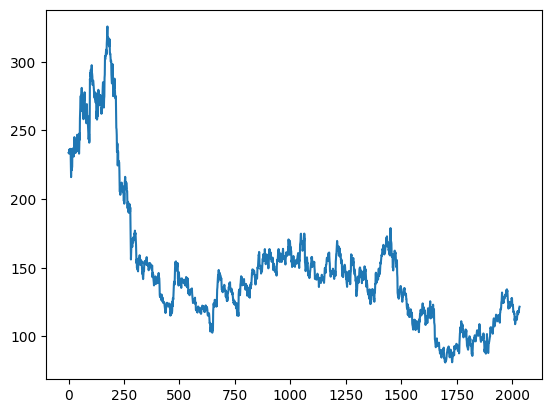

In [14]:
plt.plot(df_close)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

<b>Data Normalization</b><br>
Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
sc = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [28]:
df_close.shape

(2035, 1)

In [29]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [30]:
training_set_scaled = sc.fit_transform(training_set)

<b>Incorporating Timesteps Into Data</b><br>
We should input our data in the form of a 3D array to the LSTM model. First, we create data in 60 timesteps before using numpy to convert it into an array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [38]:
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

<b>Creating the LSTM Model</b><br>
Before we can develop the LSTM, we have to make a few imports from Keras: Sequential for initializing the neural network, LSTM to add the LSTM layer, Dropout for preventing overfitting with dropout layers, and Dense to add a densely connected neural network layer.

In [39]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

The LSTM layer is added with the following arguments: 50 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.

Specifying 0.2 in the Dropout layer means that 20% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit. To compile our model we use the Adam optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 100 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [40]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 19s 159ms/step - loss: 0.0095
Epoch 2/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0028
Epoch 3/100
62/62 [==============================] - 10s 160ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 11s 181ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 9s 150ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 8s 135ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 10s 154ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 10s 160ms/step - loss: 0.0017
Epoch 

<b>Making Predictions on the Test Set</b><br>
We start off by importing the test set as df1

In [41]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LetsGrowMore Internship/Beginner Level/Task 2-Stock Market Prediction and Marketing Using Stacked LSTM/NSE-TATAGLOBAL.csv')
real_stock_price = df1.iloc[:, 1:2].values

Before predicting future stock prices, we have to modify the test set (notice similarities to the edits we made to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [44]:
dataset_total = pd.concat((df['Open'], df1['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df1) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


<b>Plotting the Results</b><br>
After all these steps, we can use matplotlib to visualize the result of our predicted stock price and the actual stock price.

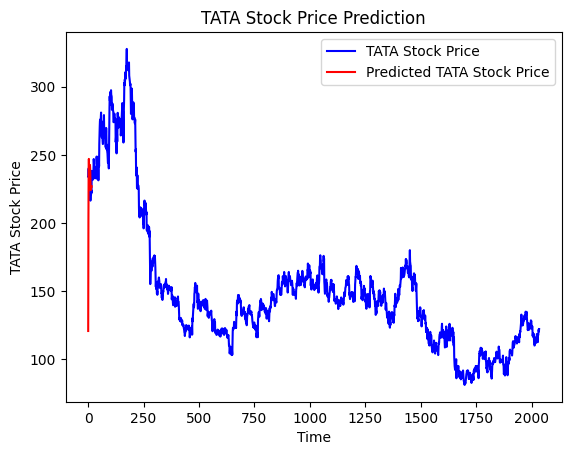

In [47]:
plt.plot(real_stock_price, color = 'blue', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

While the exact price points from our predicted price weren’t always close to the actual price, our model did still indicate overall trends such as going up or down. This project teaches us the LSTMs can be somewhat effective in times series forecasting.